# Requaired Libraries

In [112]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression ,Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load Dataset

In [74]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Missing Values

In [75]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Row And Columns

In [76]:
print('Total Rows :',df.shape[0])
print('Total Columns :',df.shape[1])

Total Rows : 1000
Total Columns : 8


# Data Info

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Statistics

In [78]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Data Visualization

# BarPlot : Maximum Math Scores by Parental Education Level

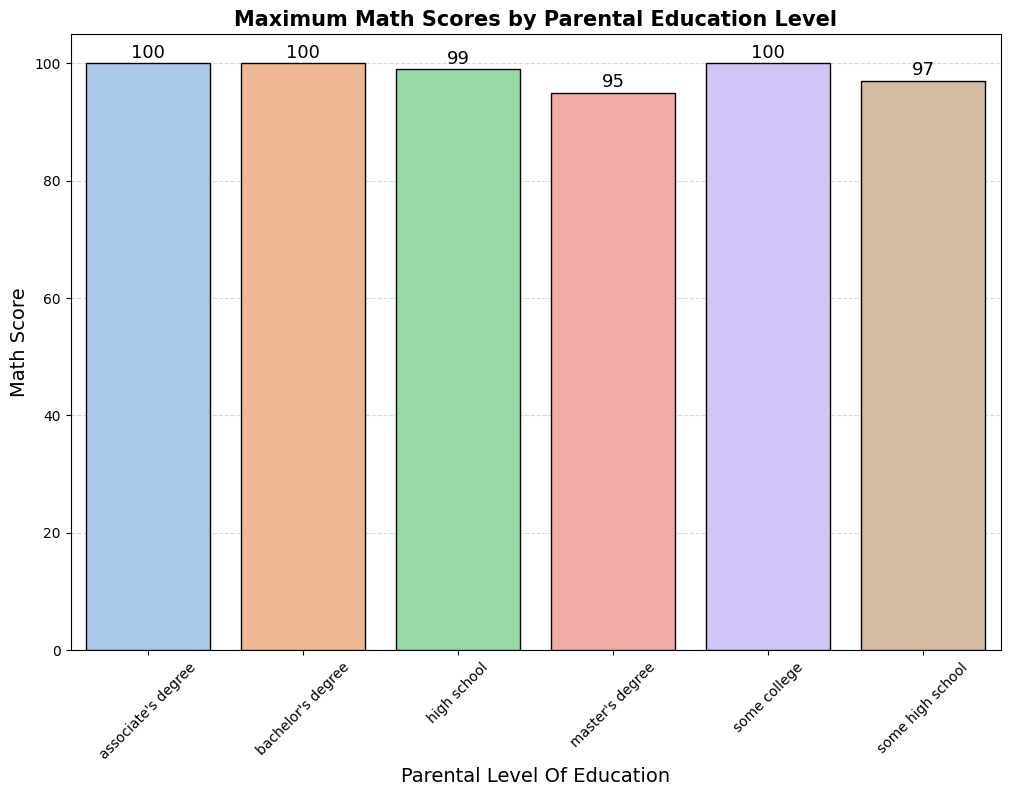

In [79]:
group=df.groupby('parental level of education')['math score'].max().reset_index(name='Math_Score')

plt.figure(figsize=(12,8))
sns.barplot(data=group, x='parental level of education', y='Math_Score',
           hue='parental level of education', palette='pastel', zorder=3,
           edgecolor='black')

for i,v in enumerate(group['Math_Score']):
    plt.text(i, v+1, str(v), ha='center',fontsize=13)
plt.xticks(rotation=45)

plt.title('Maximum Math Scores by Parental Education Level',fontsize=15,
         fontweight='bold')
plt.xlabel('Parental Level Of Education', fontsize=14)
plt.ylabel('Math Score', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5, axis='y')

plt.show()

# Test Preparation Course: Completed vs Not Completed

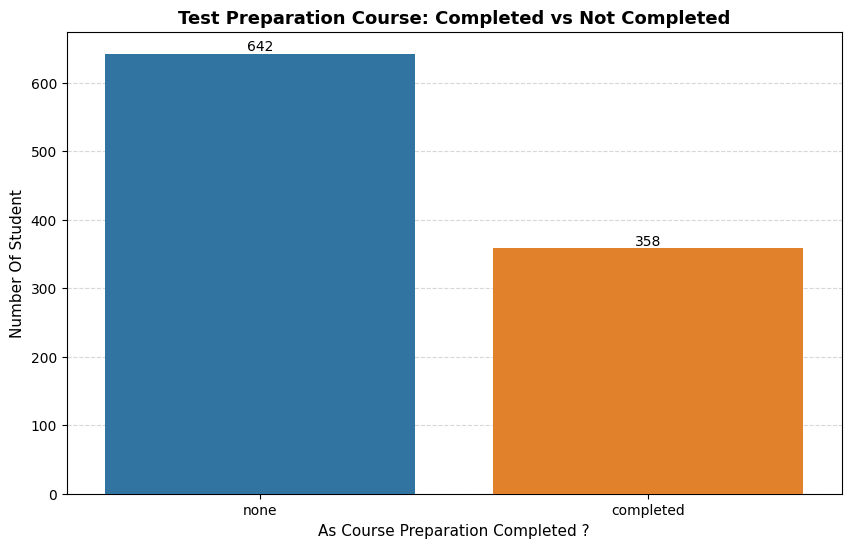

In [80]:
counts=df.value_counts('test preparation course').reset_index(name='Students')

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='test preparation course',hue='test preparation course'
             ,zorder=3)

for i,v in enumerate(counts['Students']):
    plt.text(i, v+5, str(v), ha='center', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5, axis='y')

plt.title('Test Preparation Course: Completed vs Not Completed',fontsize=13
         ,fontweight='bold')
plt.xlabel('As Course Preparation Completed ?', fontsize=11)
plt.ylabel('Number Of Student', fontsize=11)

plt.show()


# Boxplot of Math Performance by Student Ethnicity

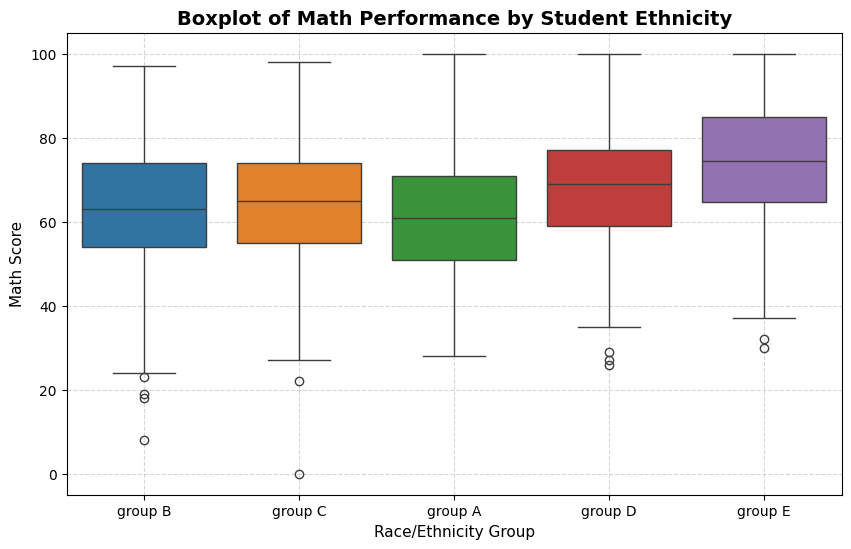

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='race/ethnicity', y='math score',hue='race/ethnicity')

plt.title('Boxplot of Math Performance by Student Ethnicity',fontsize=14
         ,fontweight='bold')
plt.xlabel('Race/Ethnicity Group', fontsize=11)
plt.ylabel('Math Score', fontsize=11)

plt.grid(True, alpha=0.5, linestyle='--')
plt.show()

# Student Distribution by Gender

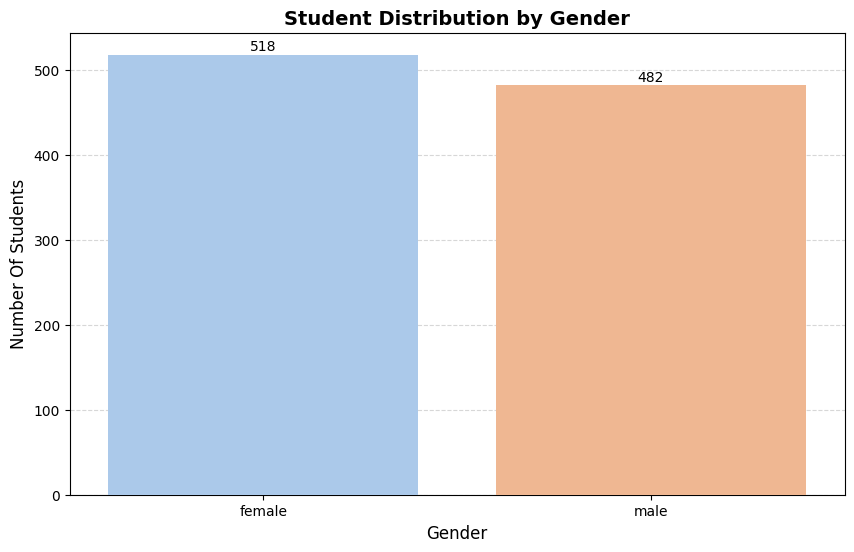

In [82]:
count_m_f=df.value_counts('gender').reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.barplot(data=count_m_f, x='gender',y='Count', hue='gender',
           palette='pastel', zorder=3)
for i,v in enumerate(count_m_f['Count']):
    plt.text(i, v+5, str(v), ha='center', fontsize=10)

plt.title('Student Distribution by Gender', fontsize=14,fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number Of Students', fontsize=12)

plt.grid(linestyle='--', alpha=0.5, axis='y')
plt.show()

# Number Of Student By Luch

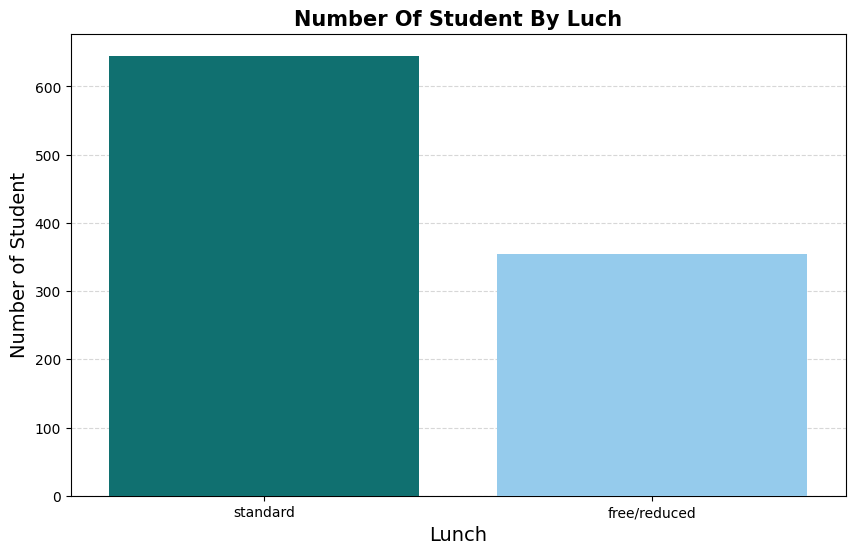

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='lunch', hue='lunch',
              palette=['teal','lightskyblue'], zorder=3)

plt.title('Number Of Student By Luch',fontsize=15,fontweight='bold')
plt.xlabel('Lunch', fontsize=14)
plt.ylabel('Number of Student', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.show()

# race_ethnicity_scores_dashboard

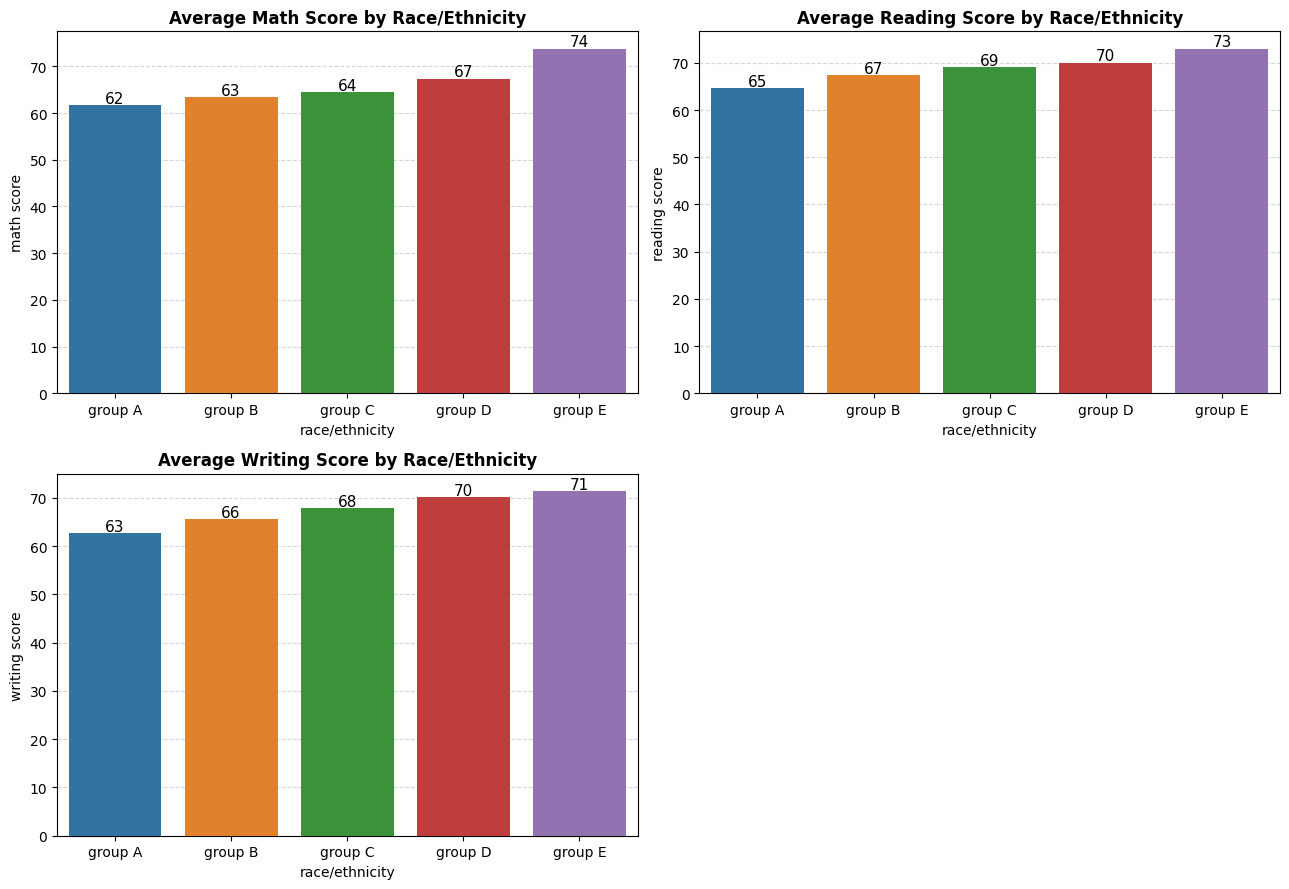

In [85]:
group_data=df.groupby('race/ethnicity')[['math score','reading score','writing score']].mean()

plt.figure(figsize=(13,9))
# Average Math Score by Race/Ethnicity
plt.subplot(2,2,1)
sns.barplot(data=group_data,x='race/ethnicity',y='math score',
            hue='race/ethnicity',zorder=3)
for i,v in enumerate(group_data['math score']):
    plt.text(i, v+0.5, f'{v:.0f}', ha='center', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')  
plt.title("Average Math Score by Race/Ethnicity",fontweight='bold')
#-------------------------------------------
plt.subplot(2,2,2)
sns.barplot(data=group_data,x='race/ethnicity',y='reading score',
            hue='race/ethnicity',zorder=3)
for i,v in enumerate(group_data['reading score']):
    plt.text(i, v+0.5, f'{v:.0f}', ha='center', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')  
plt.title("Average Reading Score by Race/Ethnicity",fontweight='bold')
#-------------------------------------------------
plt.subplot(2,2,3)
sns.barplot(data=group_data,x='race/ethnicity',y='writing score',
            hue='race/ethnicity',zorder=3)
for i,v in enumerate(group_data['writing score']):
    plt.text(i, v+0.5, f'{v:.0f}', ha='center', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')  
plt.title("Average Writing Score by Race/Ethnicity",fontweight='bold')


plt.tight_layout()

plt.show()

# Subject-Wise Score Distribution by Gender

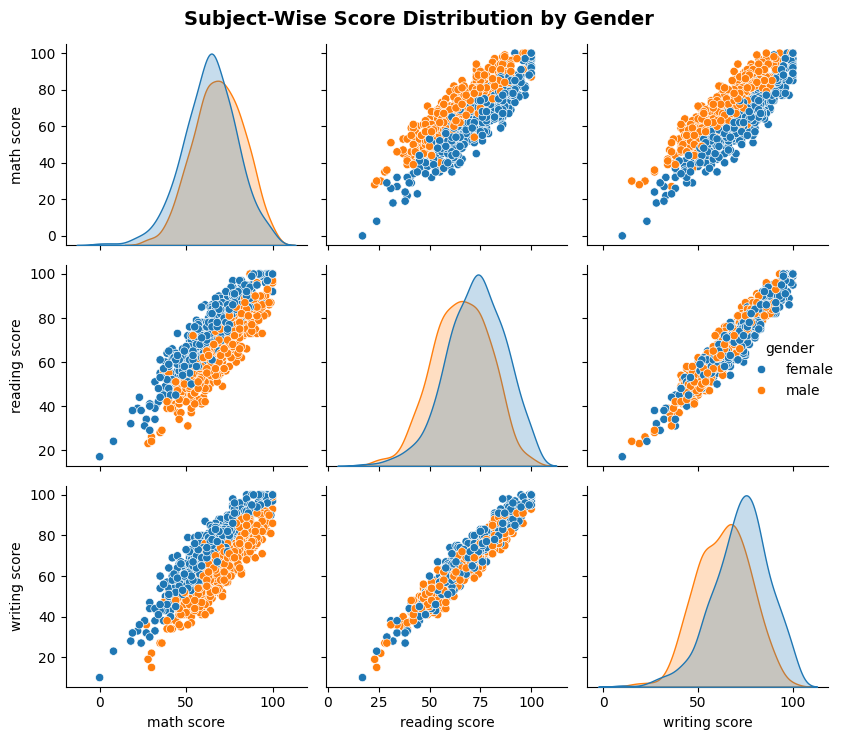

In [86]:

sns.pairplot(df, hue='gender')
plt.suptitle('Subject-Wise Score Distribution by Gender',fontsize=14,
            fontweight='bold')

plt.tight_layout()
plt.show()

# Corrletion heatmap

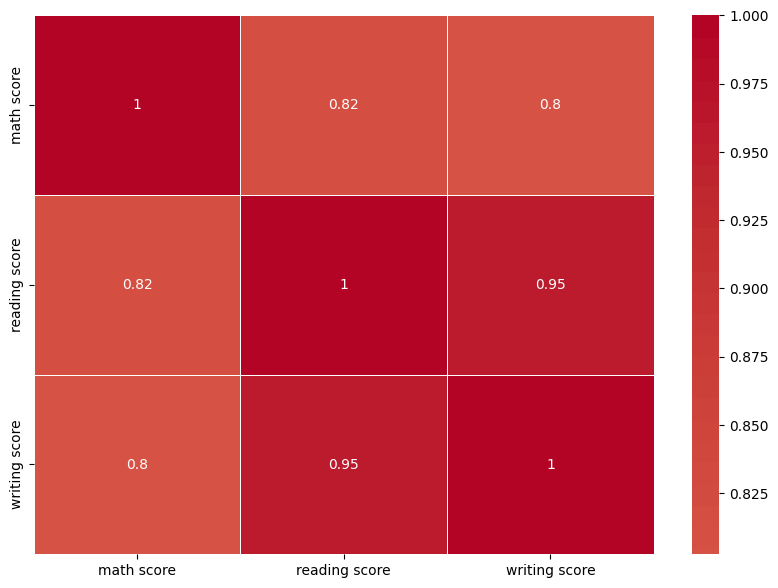

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(),
            annot=True, cmap='coolwarm',center=0, linewidth=0.5)
plt.show()

# OneHotEncoding

In [87]:
oe=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array=oe.fit_transform(df[['gender']])
df['Female_encoded']=encoded_array[:,0]
df['Male_encoded']=encoded_array[:,1]

In [89]:
ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
enco_r_e=ohe.fit_transform(df[['race/ethnicity']])

feature_name=ohe.get_feature_names_out()
enco_df=pd.DataFrame(enco_r_e, columns=feature_name)
enco_df.rename(columns={'race/ethnicity_group A':'group-A-enco','race/ethnicity_group B':'group-B-enco',
               'race/ethnicity_group C':'group-C-enco','race/ethnicity_group D':'group-D-enco',
              'race/ethnicity_group E':'group-E-enco'}, inplace=True)

In [94]:
df=pd.concat([df.reset_index(drop=True), enco_df.reset_index(drop=True)] ,axis=1)

# Machine Learning 

In [103]:
X =df[['reading score','writing score','Female_encoded',
      'group-B-enco','group-C-enco','group-D-enco','group-E-enco']]
y=df['math score']
# Spliting Data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=42)
# Scaling
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
# Model 
model=LinearRegression()
model.fit(scaled_X_train, y_train)
y_pred=model.predict(scaled_X_test)
# Metrics
r2=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

print('R2 SCORE: ',r2)
print('MSE :', mse)
print('RMSE :',np.sqrt(mse))
print('MAE :',mae)

R2 SCORE:  0.8525877653634923
MSE : 36.6777298230777
RMSE : 6.0562141493739885
MAE : 4.771988934961887


# Predicted Values

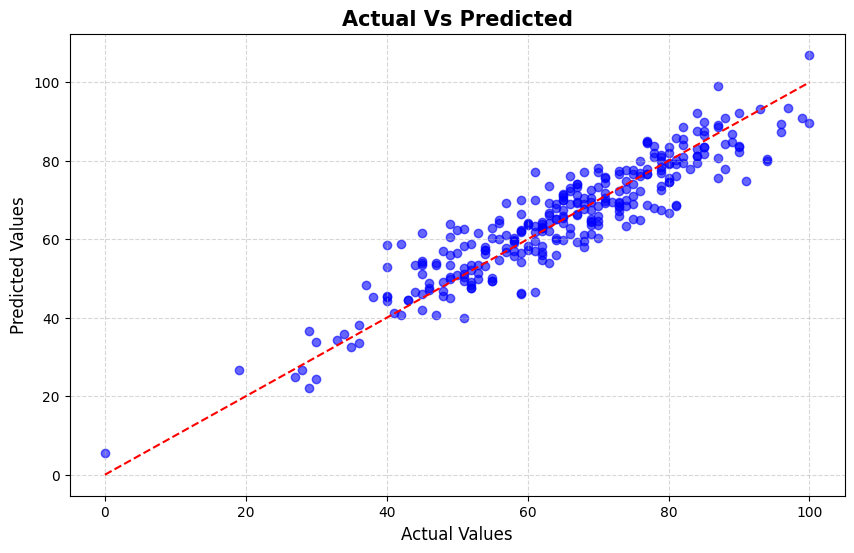

In [152]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('Actual Vs Predicted',fontsize=15, fontweight='bold')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Residual Plot

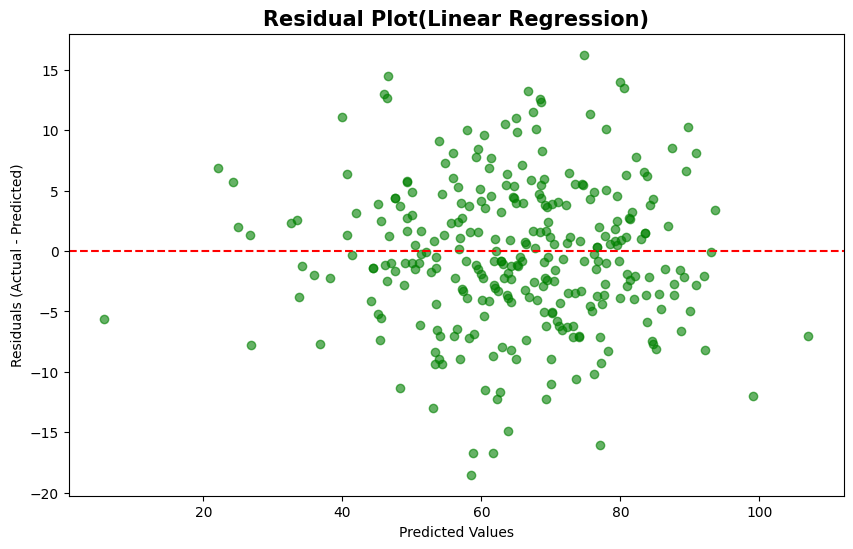

In [151]:
residual=y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residual, color='green', alpha=0.6)
plt.axhline(y=0, color='red',linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot(Linear Regression)",fontsize=15, fontweight='bold')

plt.show()

# Distribution of Error

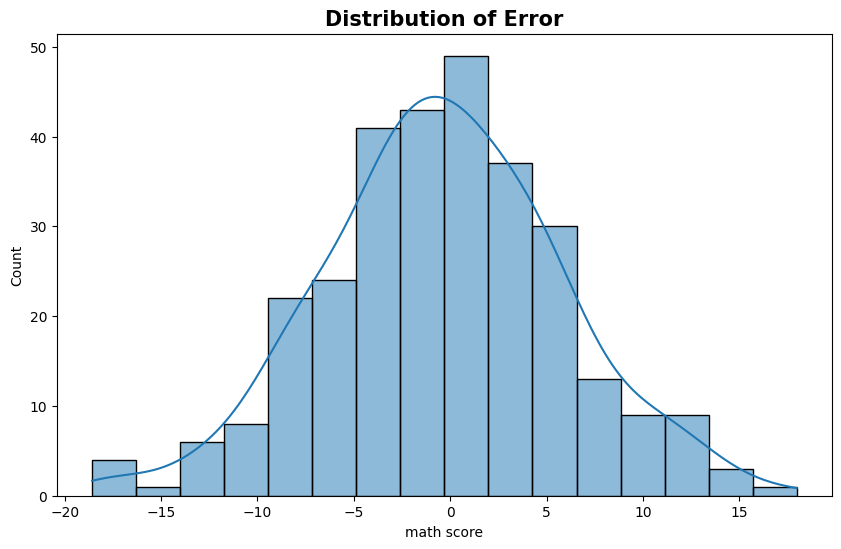

In [149]:
plt.figure(figsize=(10,6))
sns.histplot(residual, kde=True)
plt.title("Distribution of Error", fontsize=15,fontweight='bold')

plt.show()